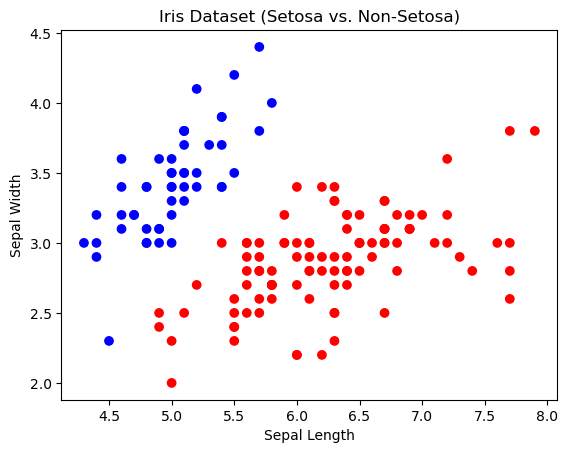

In [2]:
#Step 1: Importing libraries and Data Visualization
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X = data.data[:, :2]
y = data.target
y = np.where(y == 0, -1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Setosa vs. Non-Setosa)')
plt.show()

In [6]:
#Step 2: SVM Class Definition
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


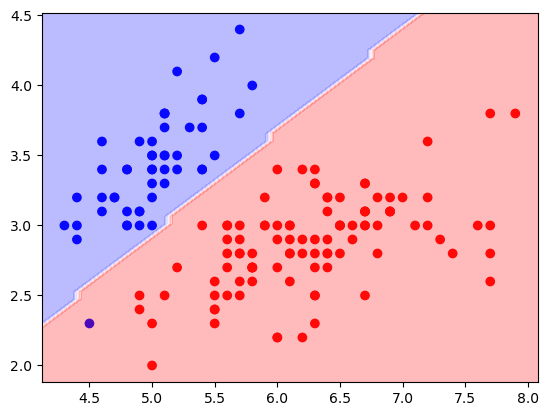

In [8]:
#Step 3: Training the Model
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X, y)

def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.show()

plot_decision_boundary(X, y, svm)


In [16]:
new_samples = np.array([[0, 0], [1, 1]])
predictions = svm.predict(new_samples)
print(predictions)

[-1. -1.]
